# CNN mosquito classifier

# 1. Import the dependencies.

In [ ]:
# This program uses the images of the detected mosquitoes because I saved them, detection was done on those and they were uploaded online to train
from PIL import Image
import cv2
import numpy as np
import random
import pandas as pd
import os
from typing import Tuple
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 2. Load images, image preprocessing, and image feature extraction
- find_label find the corresponding label for each mosquito image.
- paths_labels finds the paths of images.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/mosquito_names.csv")  # Load mosquito infor
img_names = data["img_fName"]
img_names = list(img_names)
img_classes = data["class_label"]

def find_label(file_name):  # Given the filename find the corresponding label
    if file_name in img_names:
        index = img_names.index(file_name)
        return img_classes[index]

def paths_labels() -> Tuple:  # Paths to the images
    directory = "/content/drive/MyDrive/detected_mosquitoes/train_test_images"
    img_paths = []
    img_labels = []
    # Getting each image path from the dataset
    for file_name in os.listdir(directory):
        if file_name.endswith('.jpeg'):
            file_path = os.path.join(directory, file_name)
            img_paths.append(file_path)
            img_labels.append(find_label(file_name))

    return img_paths, img_labels

imgs, img_labels = paths_labels()
resize_width = 128
resize_height = 128
images = []

for i in range(len(imgs)):  # Load the images and append them to the images list
  # Load the image
  image = cv2.imread(imgs[i])
  images.append(image)

# 3. Label encoder, and split data.
- Create a LabelEncoder and fit labels.
- Split the data into training and validating sets.

In [ ]:
label_encoder = LabelEncoder()
img_labels = label_encoder.fit_transform(img_labels)
X_train, X_valid, y_train, y_valid = train_test_split(images, img_labels, test_size=0.2, random_state=50)

num_classes = 6
X_train = np.array(X_train)
X_valid = np.array(X_valid)

# 4. Build a CNN mosquito classifiar.
- Create a Sequential model.
- Add Conv2D, MaxPooling2D, Flatten, and Densely connected layers.
- Add MaxPooling2D after every Conv2D, then after add Flatten layer, and two densely connected layers.
- Compile the model with 'adam' optimizer, 'SparseCategoricalCrossentropy' loss, and 'accuracy' as a metric.
- Fit the model to the training data.
- Plot history of the model resulting from fitting the model.

Epoch 1/15
100/100 [==============================] - 17s 46ms/step - loss: 6.1606 - accuracy: 0.5614 - val_loss: 0.6971 - val_accuracy: 0.7327
Epoch 2/15
100/100 [==============================] - 3s 34ms/step - loss: 0.7227 - accuracy: 0.7381 - val_loss: 0.6310 - val_accuracy: 0.7804
Epoch 3/15
100/100 [==============================] - 4s 36ms/step - loss: 0.6169 - accuracy: 0.7834 - val_loss: 0.5542 - val_accuracy: 0.8030
Epoch 4/15
100/100 [==============================] - 4s 35ms/step - loss: 0.6041 - accuracy: 0.8063 - val_loss: 0.6314 - val_accuracy: 0.7867
Epoch 5/15
100/100 [==============================] - 3s 35ms/step - loss: 0.5598 - accuracy: 0.8239 - val_loss: 0.7122 - val_accuracy: 0.7629
Epoch 6/15
100/100 [==============================] - 3s 35ms/step - loss: 0.5444 - accuracy: 0.8182 - val_loss: 0.5463 - val_accuracy: 0.8281
Epoch 7/15
100/100 [==============================] - 4s 36ms/step - loss: 0.4573 - accuracy: 0.8496 - val_loss: 0.5289 - val_accuracy: 0.849

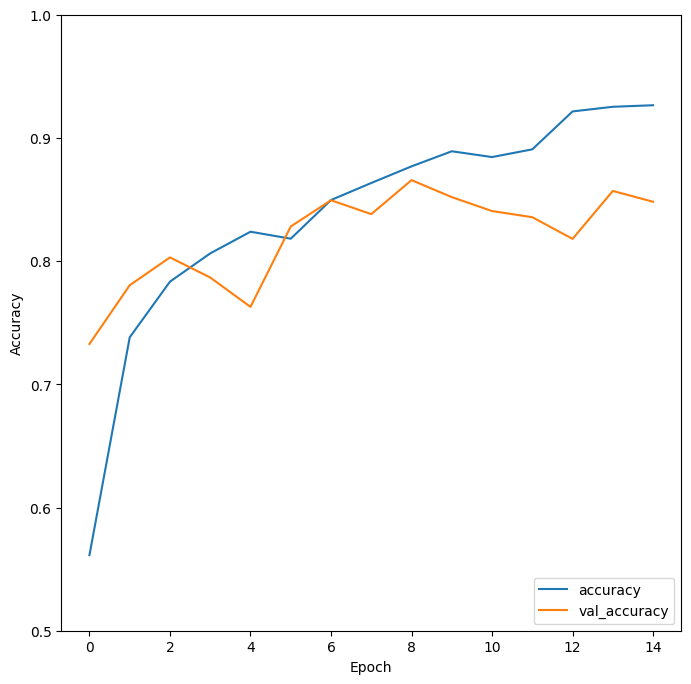

In [ ]:
# Build the CNN
model = Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
his = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))
loss, accuracy = model.evaluate(X_valid, y_valid)
print('Loss: ', loss)
print('Accuracy: ', accuracy)

plt.figure(figsize=(8, 8))
plt.plot(his.history['accuracy'], label='accuracy')
plt.plot(his.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.savefig("cnn_report.png")

### Save the model.

In [ ]:
model.save("cnn_mosquito.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
